## Continuous state Markov chain

Generate a Gaussian.

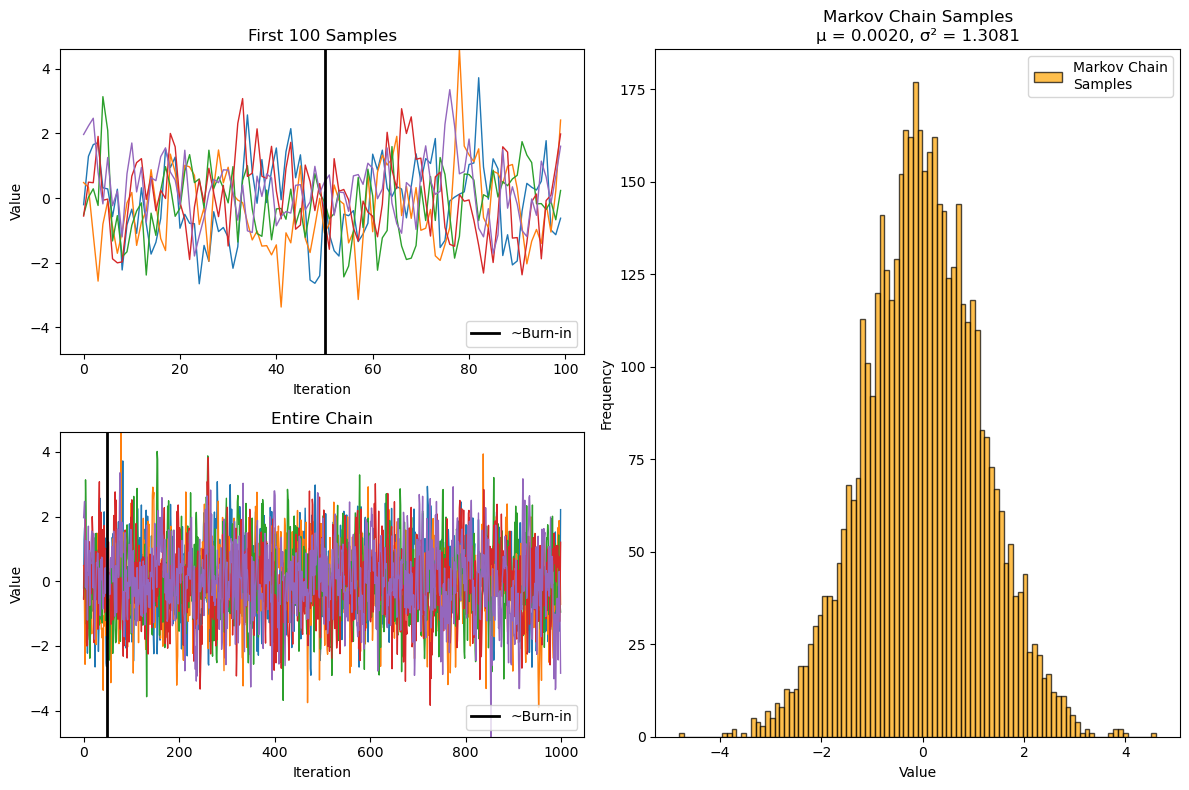

Number of chains: 5
Number of transitions: 1000
Burn-in period: 50
Effective samples per chain: 950

Post burn-in statistics:
Sample mean: 0.0020
Sample variance: 1.3081
Sample standard deviation: 1.1437

Theoretical stationary variance: 1.3333
Difference from sample: 0.0252
Relative error: 0.0189


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# EXAMPLE OF CONTINUOUS STATE-SPACE MARKOV CHAIN

# INITIALIZE
np.random.seed(12345)
nBurnin = 50      # # BURNIN
nChains = 5       # # MARKOV CHAINS

# DEFINE TRANSITION OPERATOR
def P(x, nChains):
    """Transition operator: P(x) = Normal(0.5*x, 1)"""
    return np.random.normal(0.5 * x, 1, size=(1, nChains))

nTransitions = 1000
x = np.zeros((nTransitions, nChains))
# Initial chain is N(0,1)
x[0, :] = np.random.randn(nChains)

# RUN THE CHAINS
for iT in range(1, nTransitions):
    x[iT, :] = P(x[iT-1, :], nChains)

# Calculate global min/max for consistent y-axis scaling
minn = np.min(x)
maxx = np.max(x)

# DISPLAY
fig = plt.figure(figsize=(12, 8))

# DISPLAY BURNIN (First 100 samples)
plt.subplot(2, 2, 1)
plt.plot(x[:100, :], linewidth=1)
plt.axvline(x=nBurnin, color='k', linewidth=2, label='~Burn-in')
plt.ylim([minn, maxx])
plt.legend(loc='lower right')
plt.title('First 100 Samples')
plt.xlabel('Iteration')
plt.ylabel('Value')

# DISPLAY ENTIRE MARKOV CHAIN
plt.subplot(2, 2, 3)
plt.plot(x, linewidth=1)
plt.axvline(x=nBurnin, color='k', linewidth=2, label='~Burn-in')
plt.ylim([minn, maxx])
plt.legend(loc='lower right')
plt.title('Entire Chain')
plt.xlabel('Iteration')
plt.ylabel('Value')

# DISPLAY SAMPLES FROM STATIONARY DISTRIBUTION
samples = x[nBurnin:, :]  # Remove burn-in samples
plt.subplot(1, 2, 2)
counts, bins, patches = plt.hist(samples.flatten(), bins=100, 
                                color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
sample_mean = np.mean(samples)
sample_var = np.var(samples)
plt.title(f'Markov Chain Samples\nμ = {sample_mean:.4f}, σ² = {sample_var:.4f}')
plt.legend(['Markov Chain\nSamples'])

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Number of chains: {nChains}")
print(f"Number of transitions: {nTransitions}")
print(f"Burn-in period: {nBurnin}")
print(f"Effective samples per chain: {nTransitions - nBurnin}")
print(f"\nPost burn-in statistics:")
print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample variance: {sample_var:.4f}")
print(f"Sample standard deviation: {np.sqrt(sample_var):.4f}")

# Theoretical analysis for AR(1) process: X_t = 0.5*X_{t-1} + ε_t
# For stationary AR(1): X_t = φ*X_{t-1} + ε_t where ε_t ~ N(0,σ²)
# Theoretical variance = σ²/(1-φ²) = 1/(1-0.5²) = 4/3 ≈ 1.333
theoretical_var = 1 / (1 - 0.5**2)
print(f"\nTheoretical stationary variance: {theoretical_var:.4f}")
print(f"Difference from sample: {abs(sample_var - theoretical_var):.4f}")
print(f"Relative error: {abs(sample_var - theoretical_var)/theoretical_var:.4f}")